In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd

In [77]:
df = pd.read_csv("https://github.com/keerthi97/CODSOFT/blob/7e6bcab09b668e5c60decd690f761274dc868635/datasets/IMDb%20Movies%20India.csv?raw=true", encoding='utf-8', encoding_errors='ignore')

In [78]:
print(df.head())

print("Data types", df.dtypes)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Dataset shape: (15508, 10)
Basic statistics for numeric columns:
              Year    Duration       Rating       Votes
count      14981.0      7240.0  7919.000000      6548.0
mean   1987.012215  128.126519     5.841621  120.839493
std      25.416689   28.912724     1.381777   194.21139
min         1913.0         2.0     1.100000         5.0
25%         1968.0       110.0     4.900000        13.0
50%         1991.0       131.0     6.000000        35.0
75%         2009.0       147.0     6.800000       123.0
max         2022.0       321.0    10.000000       999.0
Number of movies by year:
Year
2000    266
2001    278
2002    244
2003    248
2004    290
2005    346
2006    181
2007    181
2008    173
2009    196
2010    195
2011    198
2012    223
2013    252
2014    246
2015    284
2016    305
2017    360
2018    381
2019    410
2020    320
2021    392
2022     38
Name: count, dtype: Int64
Data cleaning completed


<ipython-input-79-1e16302aacc7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recent_years.index.astype(int), y=recent_years.values, palette='viridis')


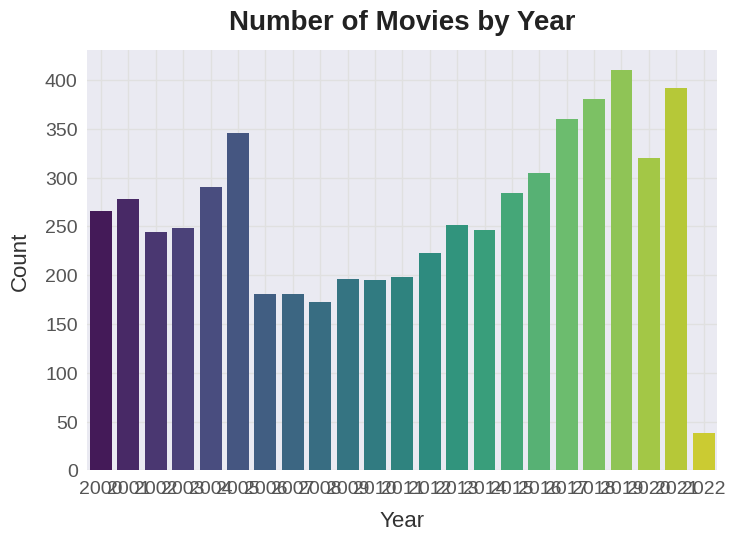

Plot created.


In [79]:
###data cleaning and transforming

plt.style.use('seaborn-v0_8')


df = df[df['Name'].notna() & (df['Name'].str.strip() != '')] # 1 dropped

df['Duration'] = df['Duration'].str.replace(r'min', '', regex=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').astype('Int64')

df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

df['Rating'] =  pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] =  pd.to_numeric(df['Votes'], errors='coerce').astype('Int64')

# Display basic information
print('Dataset shape:', df.shape)
print('Basic statistics for numeric columns:')
print(df.describe())

# Count of movies by year
recent_years = df[df['Year'] >= 2000]['Year'].value_counts().sort_index()
print('Number of movies by year:')
print(recent_years)

print('Data cleaning completed')

# Plot count of movies by year
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.barplot(x=recent_years.index.astype(int), y=recent_years.values, palette='viridis')
plt.title('Number of Movies by Year', pad=15, fontsize=20, fontweight='semibold', color='#222222')
plt.xlabel('Year', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
plt.xticks(fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(color='#E0E0E0')
plt.gca().set_axisbelow(True)
plt.show()

print('Plot created.')


In [80]:
df = df.drop_duplicates()

In [81]:
pd.set_option("display.max_rows", False)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,<NA>,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,<NA>,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,<NA>,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,2008,59,Documentary,NaN,<NA>,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...


In [82]:
df['Genre1'] = df.Genre.str.split(',',expand=True)[0]
df['Genre2'] = df.Genre.str.split(',',expand=True)[1]
df['Genre3'] = df.Genre.str.split(',',expand=True)[2]

<ipython-input-82-b9efc45ab21e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre1'] = df.Genre.str.split(',',expand=True)[0]
<ipython-input-82-b9efc45ab21e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre2'] = df.Genre.str.split(',',expand=True)[1]
<ipython-input-82-b9efc45ab21e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [83]:
df = df.drop(columns=['Genre'])

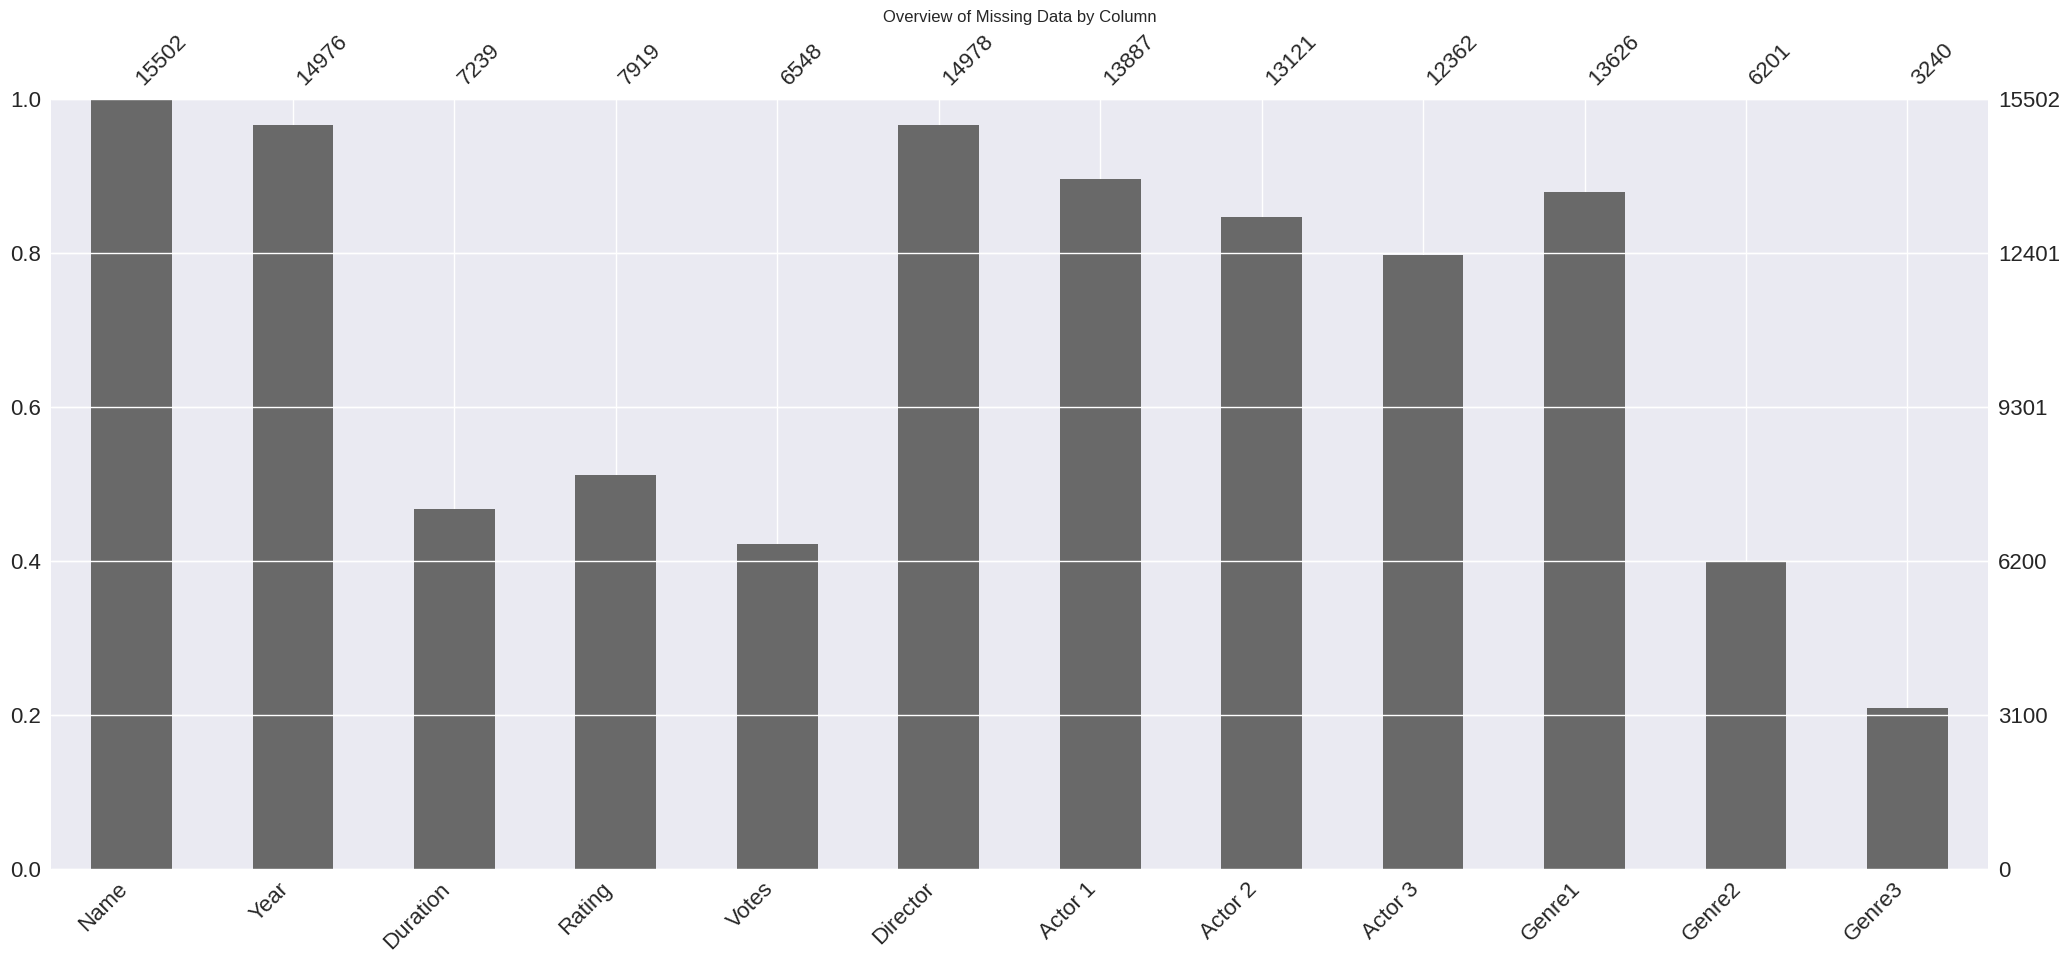

In [84]:
###Exploratory Data Analysis

###checking for missing values

# Bar Plot (Nullity by Column)

msno.bar(df)
plt.title("Overview of Missing Data by Column")
plt.show()

In [85]:
cols = ['Year', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration']
df[cols].isna().mean()

,0
Year,0.033931
Rating,0.489163
Votes,0.577603
Director,0.033802
Actor 1,0.104180
Actor 2,0.153593
Actor 3,0.202555
Duration,0.533028


<Figure size 600x400 with 0 Axes>

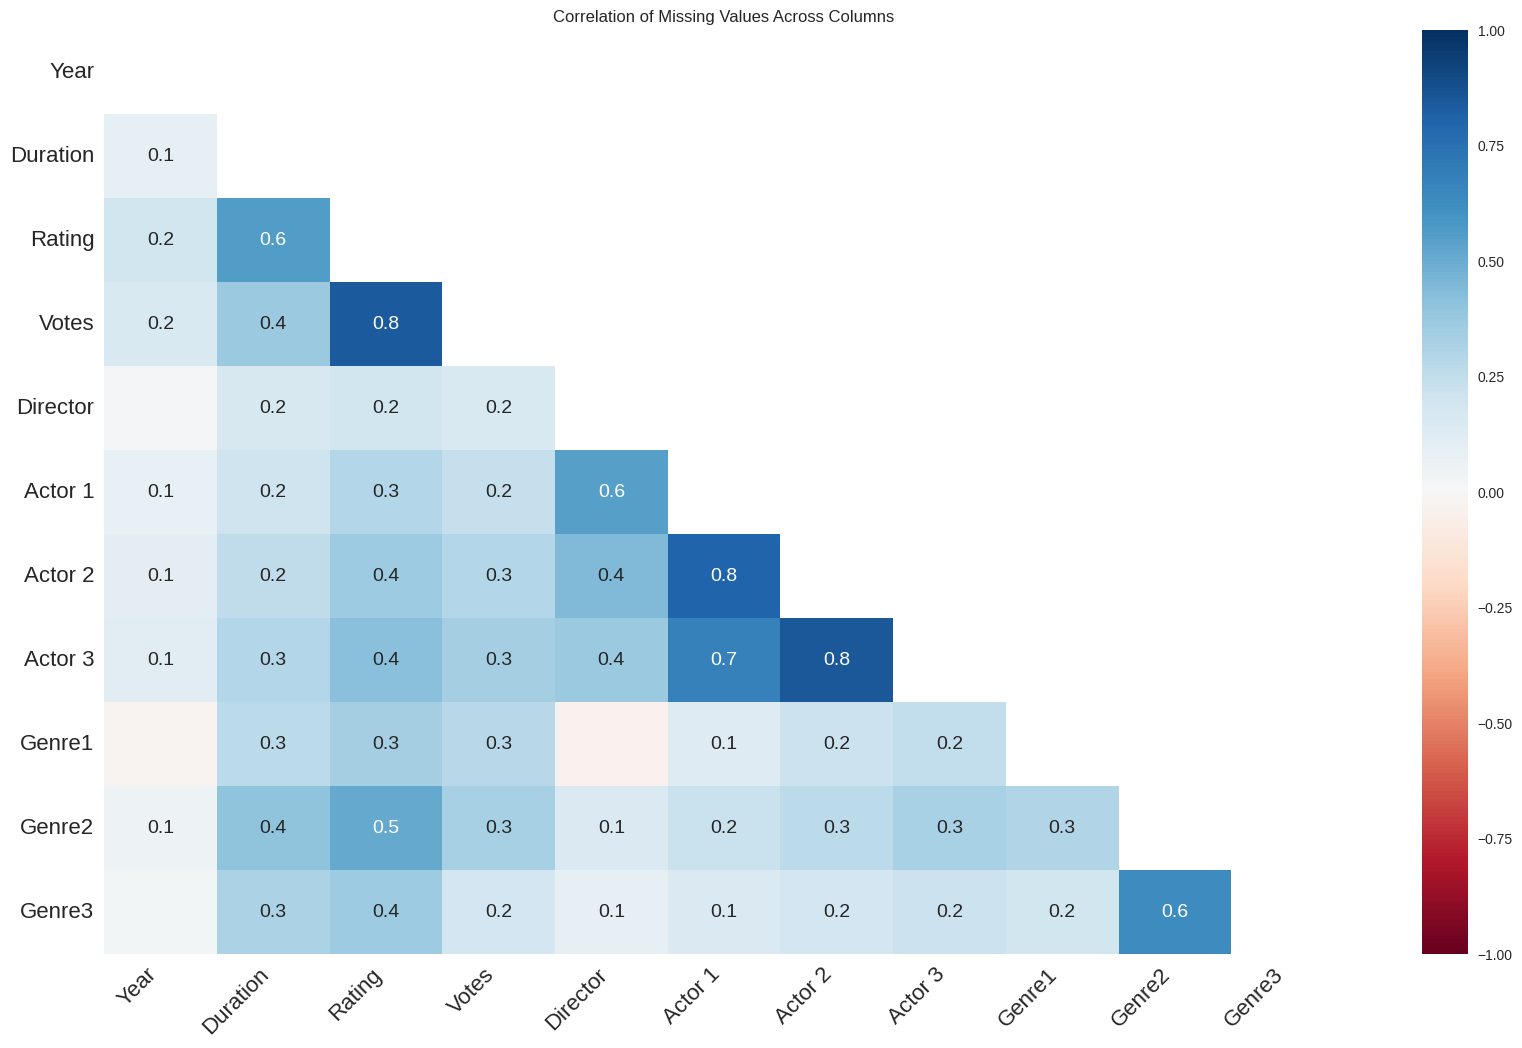

In [86]:
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(6, 4))
msno.heatmap(df)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

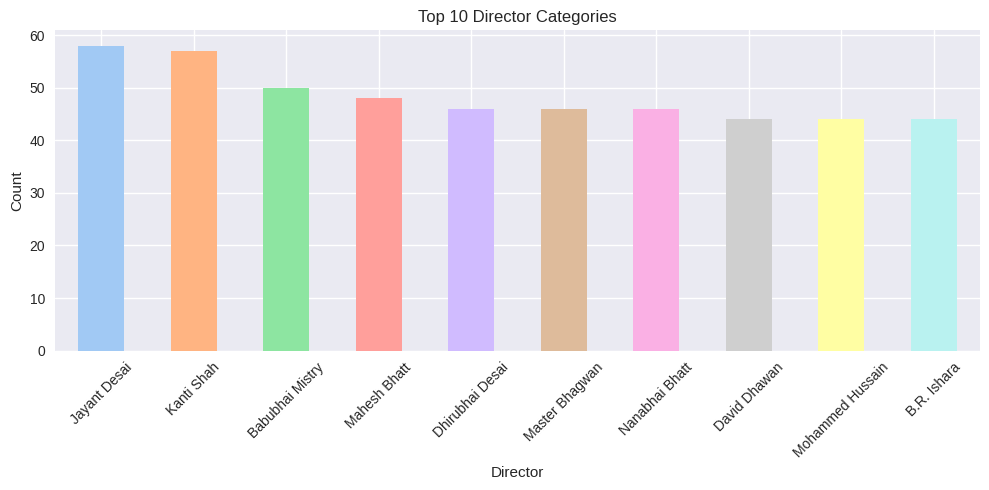

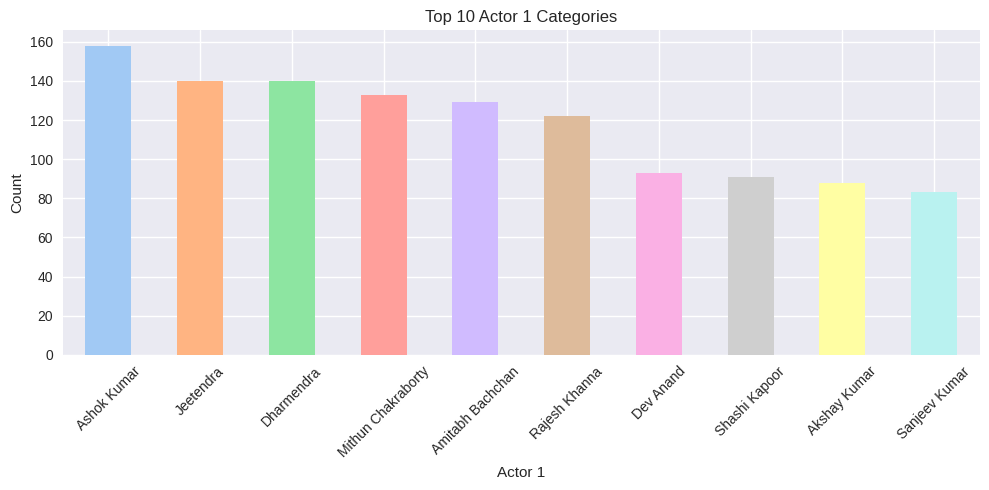

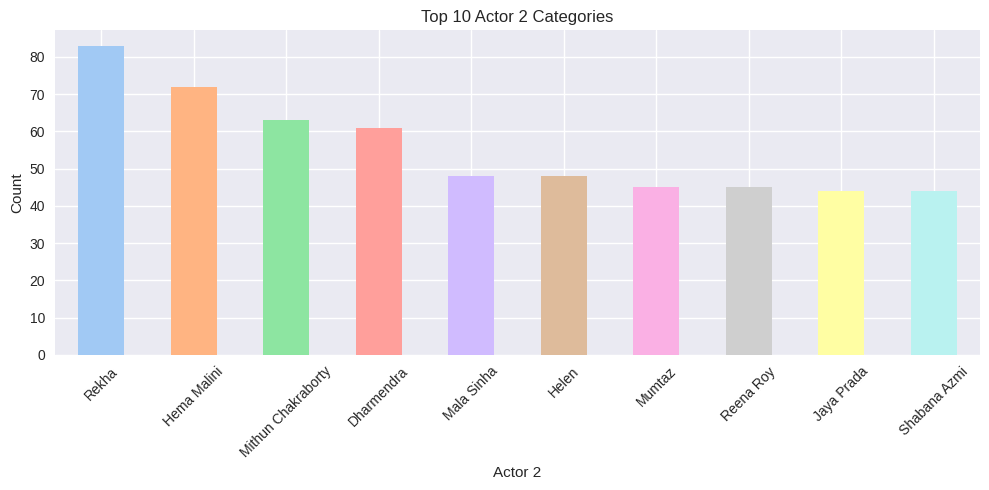

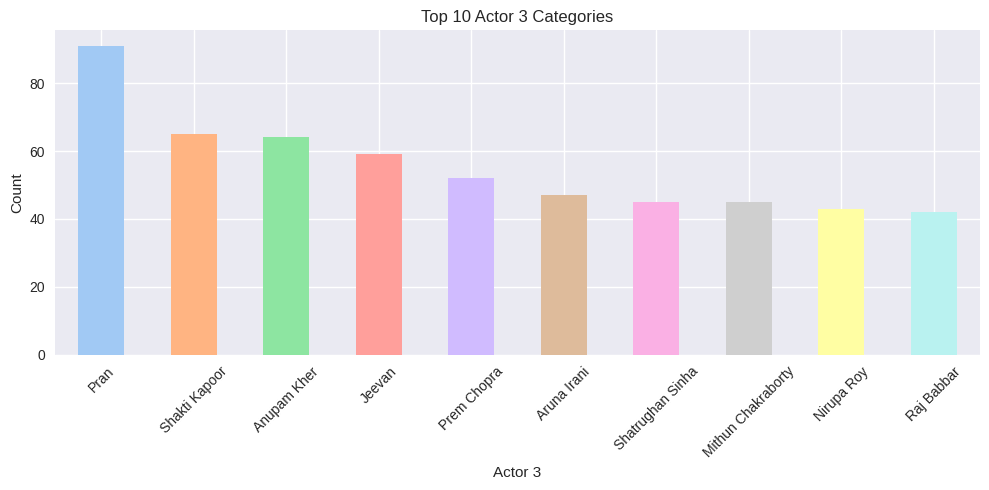

In [87]:
###Check the distribution of rating and movies for director and actors
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(column):
    plt.figure(figsize=(10, 5))

    if df[column].dtype == 'object':
        df[column].value_counts().head(10).plot.bar(color=sns.color_palette('pastel'))
        plt.title(f'Top 10 {column} Categories')
        plt.xlabel(column)
        plt.ylabel('Count')
    else:
        plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each column
for col in ['Director','Actor 1','Actor 2','Actor 3']:
    plot_distribution(col)


In [88]:
df.dropna(inplace=True) ##remove the missing values

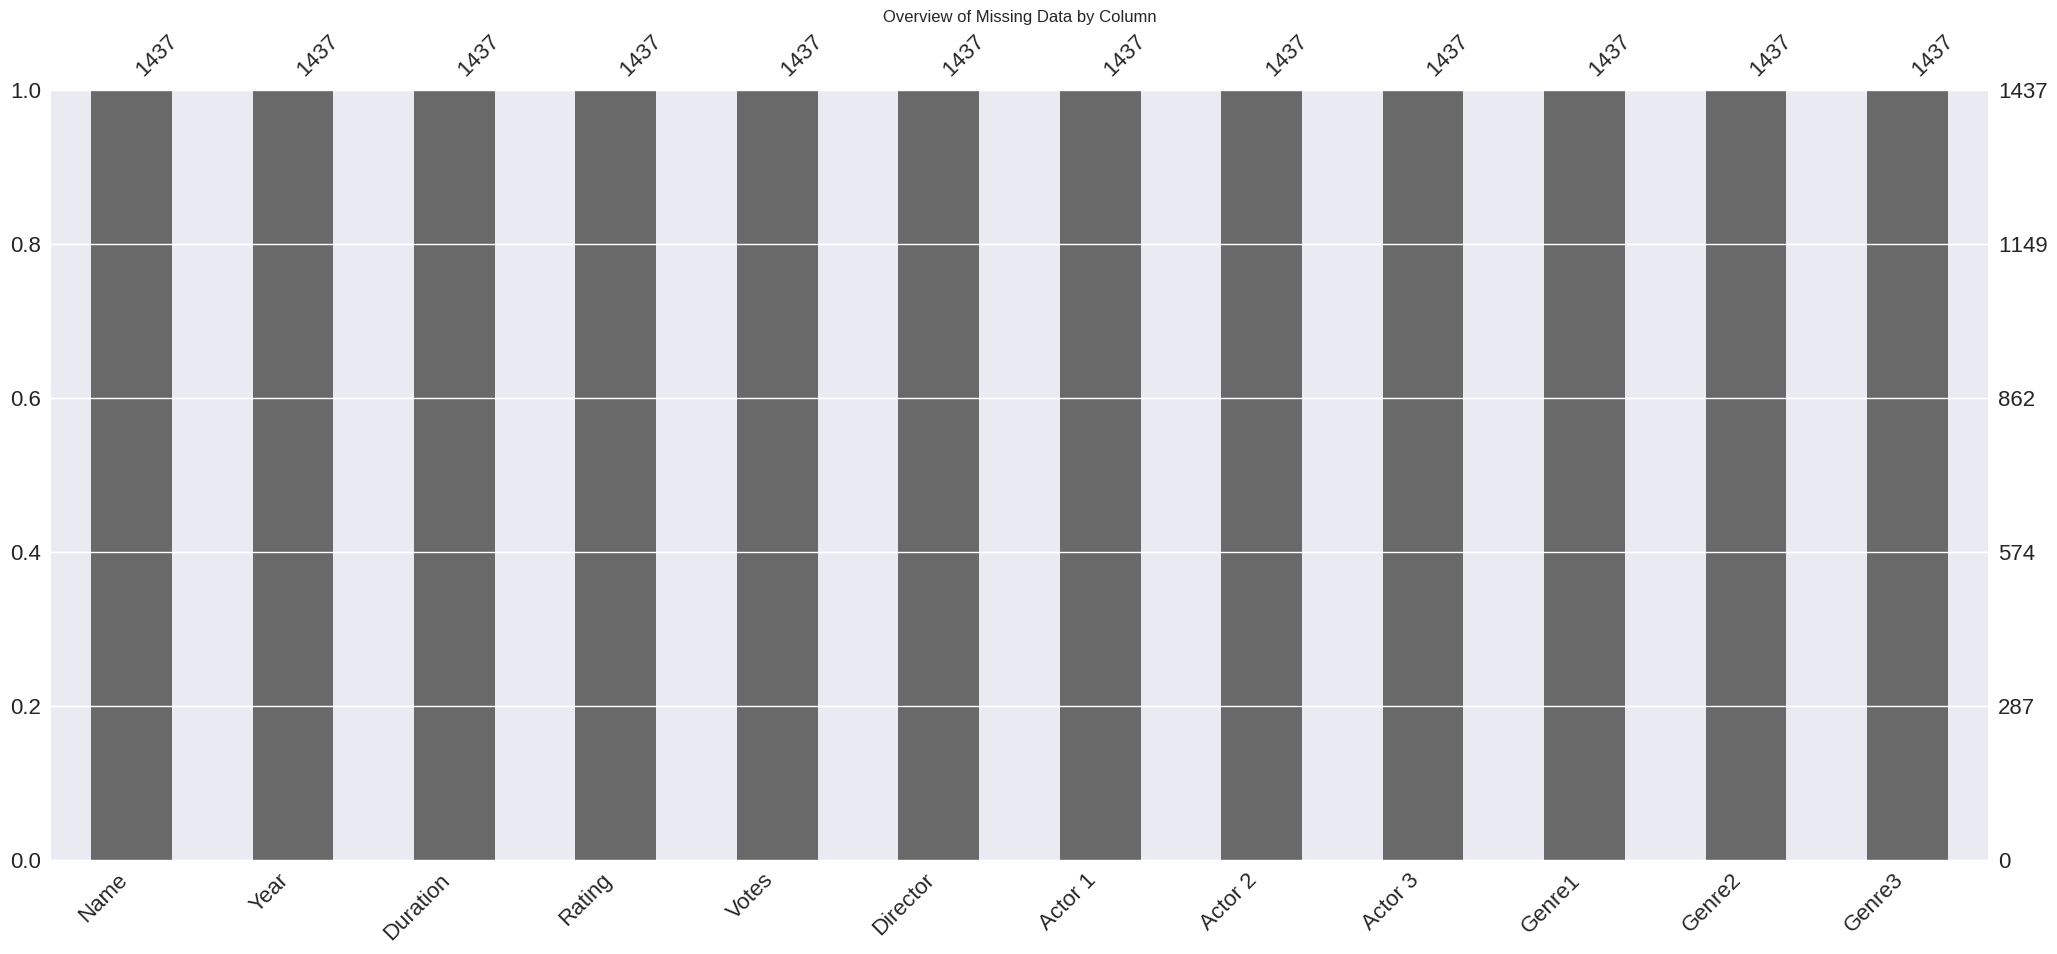

In [89]:
msno.bar(df)
plt.title("Overview of Missing Data by Column")
plt.show()

In [90]:
##from the above distribution we can find an average rating for each director and actor

dir_avg_rating = {}
for index, row in df.iterrows():
    director = row['Director']
    rating = row['Rating']
    if director in dir_avg_rating:
        dir_avg_rating[director]['sum'] += rating
        dir_avg_rating[director]['count'] += 1
    else:
        dir_avg_rating[director] = {'sum': rating, 'count': 1}

df['Director Rating'] = df['Director'].apply(lambda x: dir_avg_rating[x]['sum'] / dir_avg_rating[x]['count'])

In [91]:
## we can take actor 1
actor_avg_rating = {}
for index, row in df.iterrows():
    actors = row['Actor 1'].split(', ')
    rating = row['Rating']
    for actor in actors:
        if actor in actor_avg_rating:
            actor_avg_rating[actor]['sum'] += rating
            actor_avg_rating[actor]['count'] += 1
        else:
            actor_avg_rating[actor] = {'sum': rating, 'count': 1}

def calculate_lead_actor_average(row):
    actors = row['Actor 1'].split(', ')
    lead_actor_ratings = [actor_avg_rating[actor]['sum'] / actor_avg_rating[actor]['count'] for actor in actors]
    return max(lead_actor_ratings)

df['Actor Rating'] = df.apply(calculate_lead_actor_average, axis=1)

In [92]:
## remove the column Actor and director

del df['Actor 1']
del df['Actor 2']
del df['Director']
del df['Actor 3']
del df['Name']

In [93]:
df.shape
df.head()

,Year,Duration,Rating,Votes,Genre1,Genre2,Genre3,Director Rating,Actor Rating
5,1997,147,4.7,827,Comedy,Drama,Musical,5.075000,4.357143
8,2012,82,5.6,326,Horror,Mystery,Thriller,5.600000,5.600000
9,2014,116,4.0,11,Action,Crime,Thriller,4.000000,4.000000
12,1991,161,6.5,983,Horror,Romance,Thriller,5.216667,5.256250
13,2012,166,5.7,512,Comedy,Drama,Romance,5.700000,5.700000


In [94]:
##transform the categorical column to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Genre1', 'Genre2', 'Genre3']:
    df[col] = le.fit_transform(df[col].astype(str))


In [95]:
df.head()

,Year,Duration,Rating,Votes,Genre1,Genre2,Genre3,Director Rating,Actor Rating
5,1997,147,4.7,827,4,5,10,5.075000,4.357143
8,2012,82,5.6,326,11,12,16,5.600000,5.600000
9,2014,116,4.0,11,0,4,16,4.000000,4.000000
12,1991,161,6.5,983,11,13,16,5.216667,5.256250
13,2012,166,5.7,512,4,5,13,5.700000,5.700000


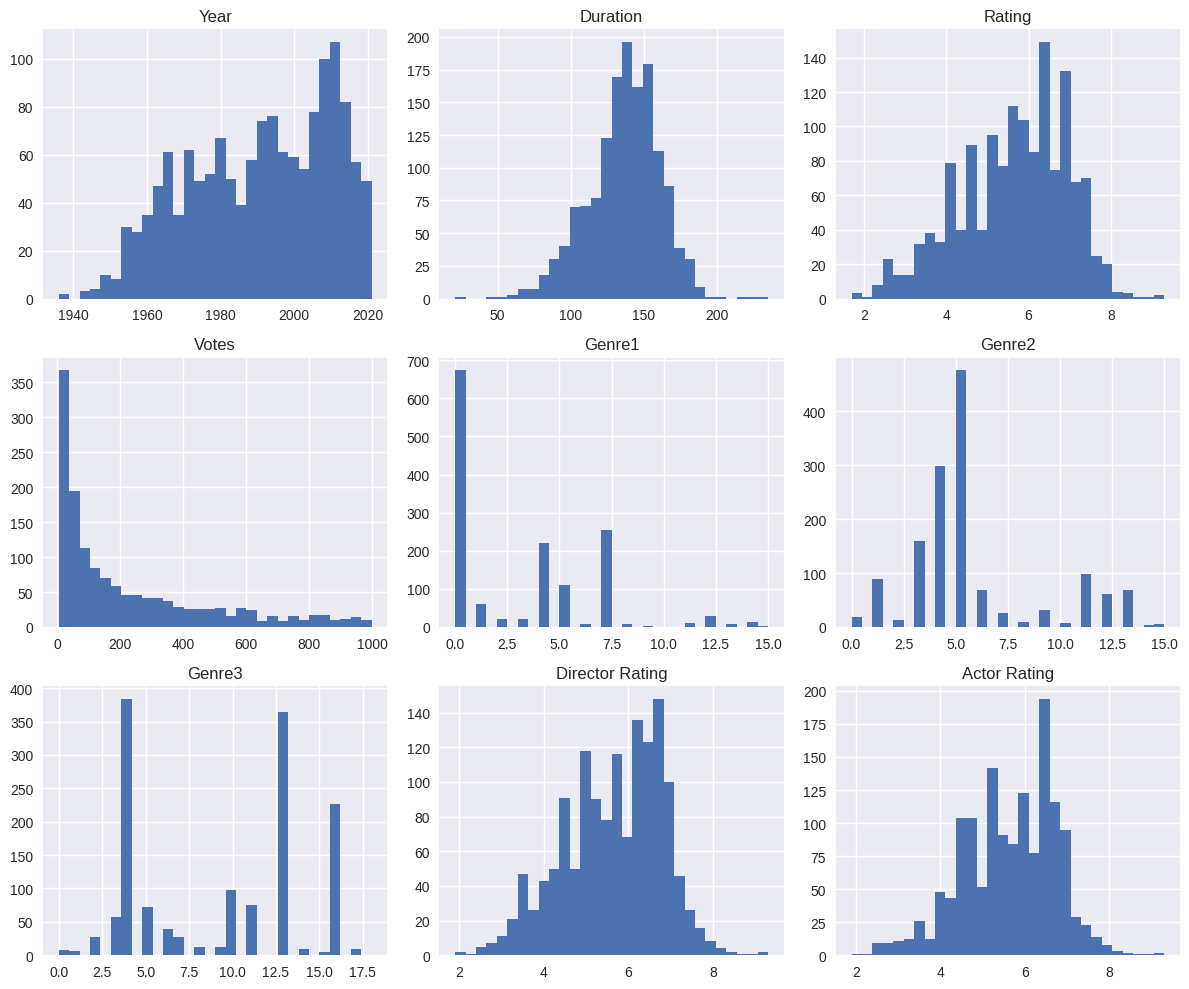

In [96]:
##check the fearure distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature in X_train (features in the dataset)
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

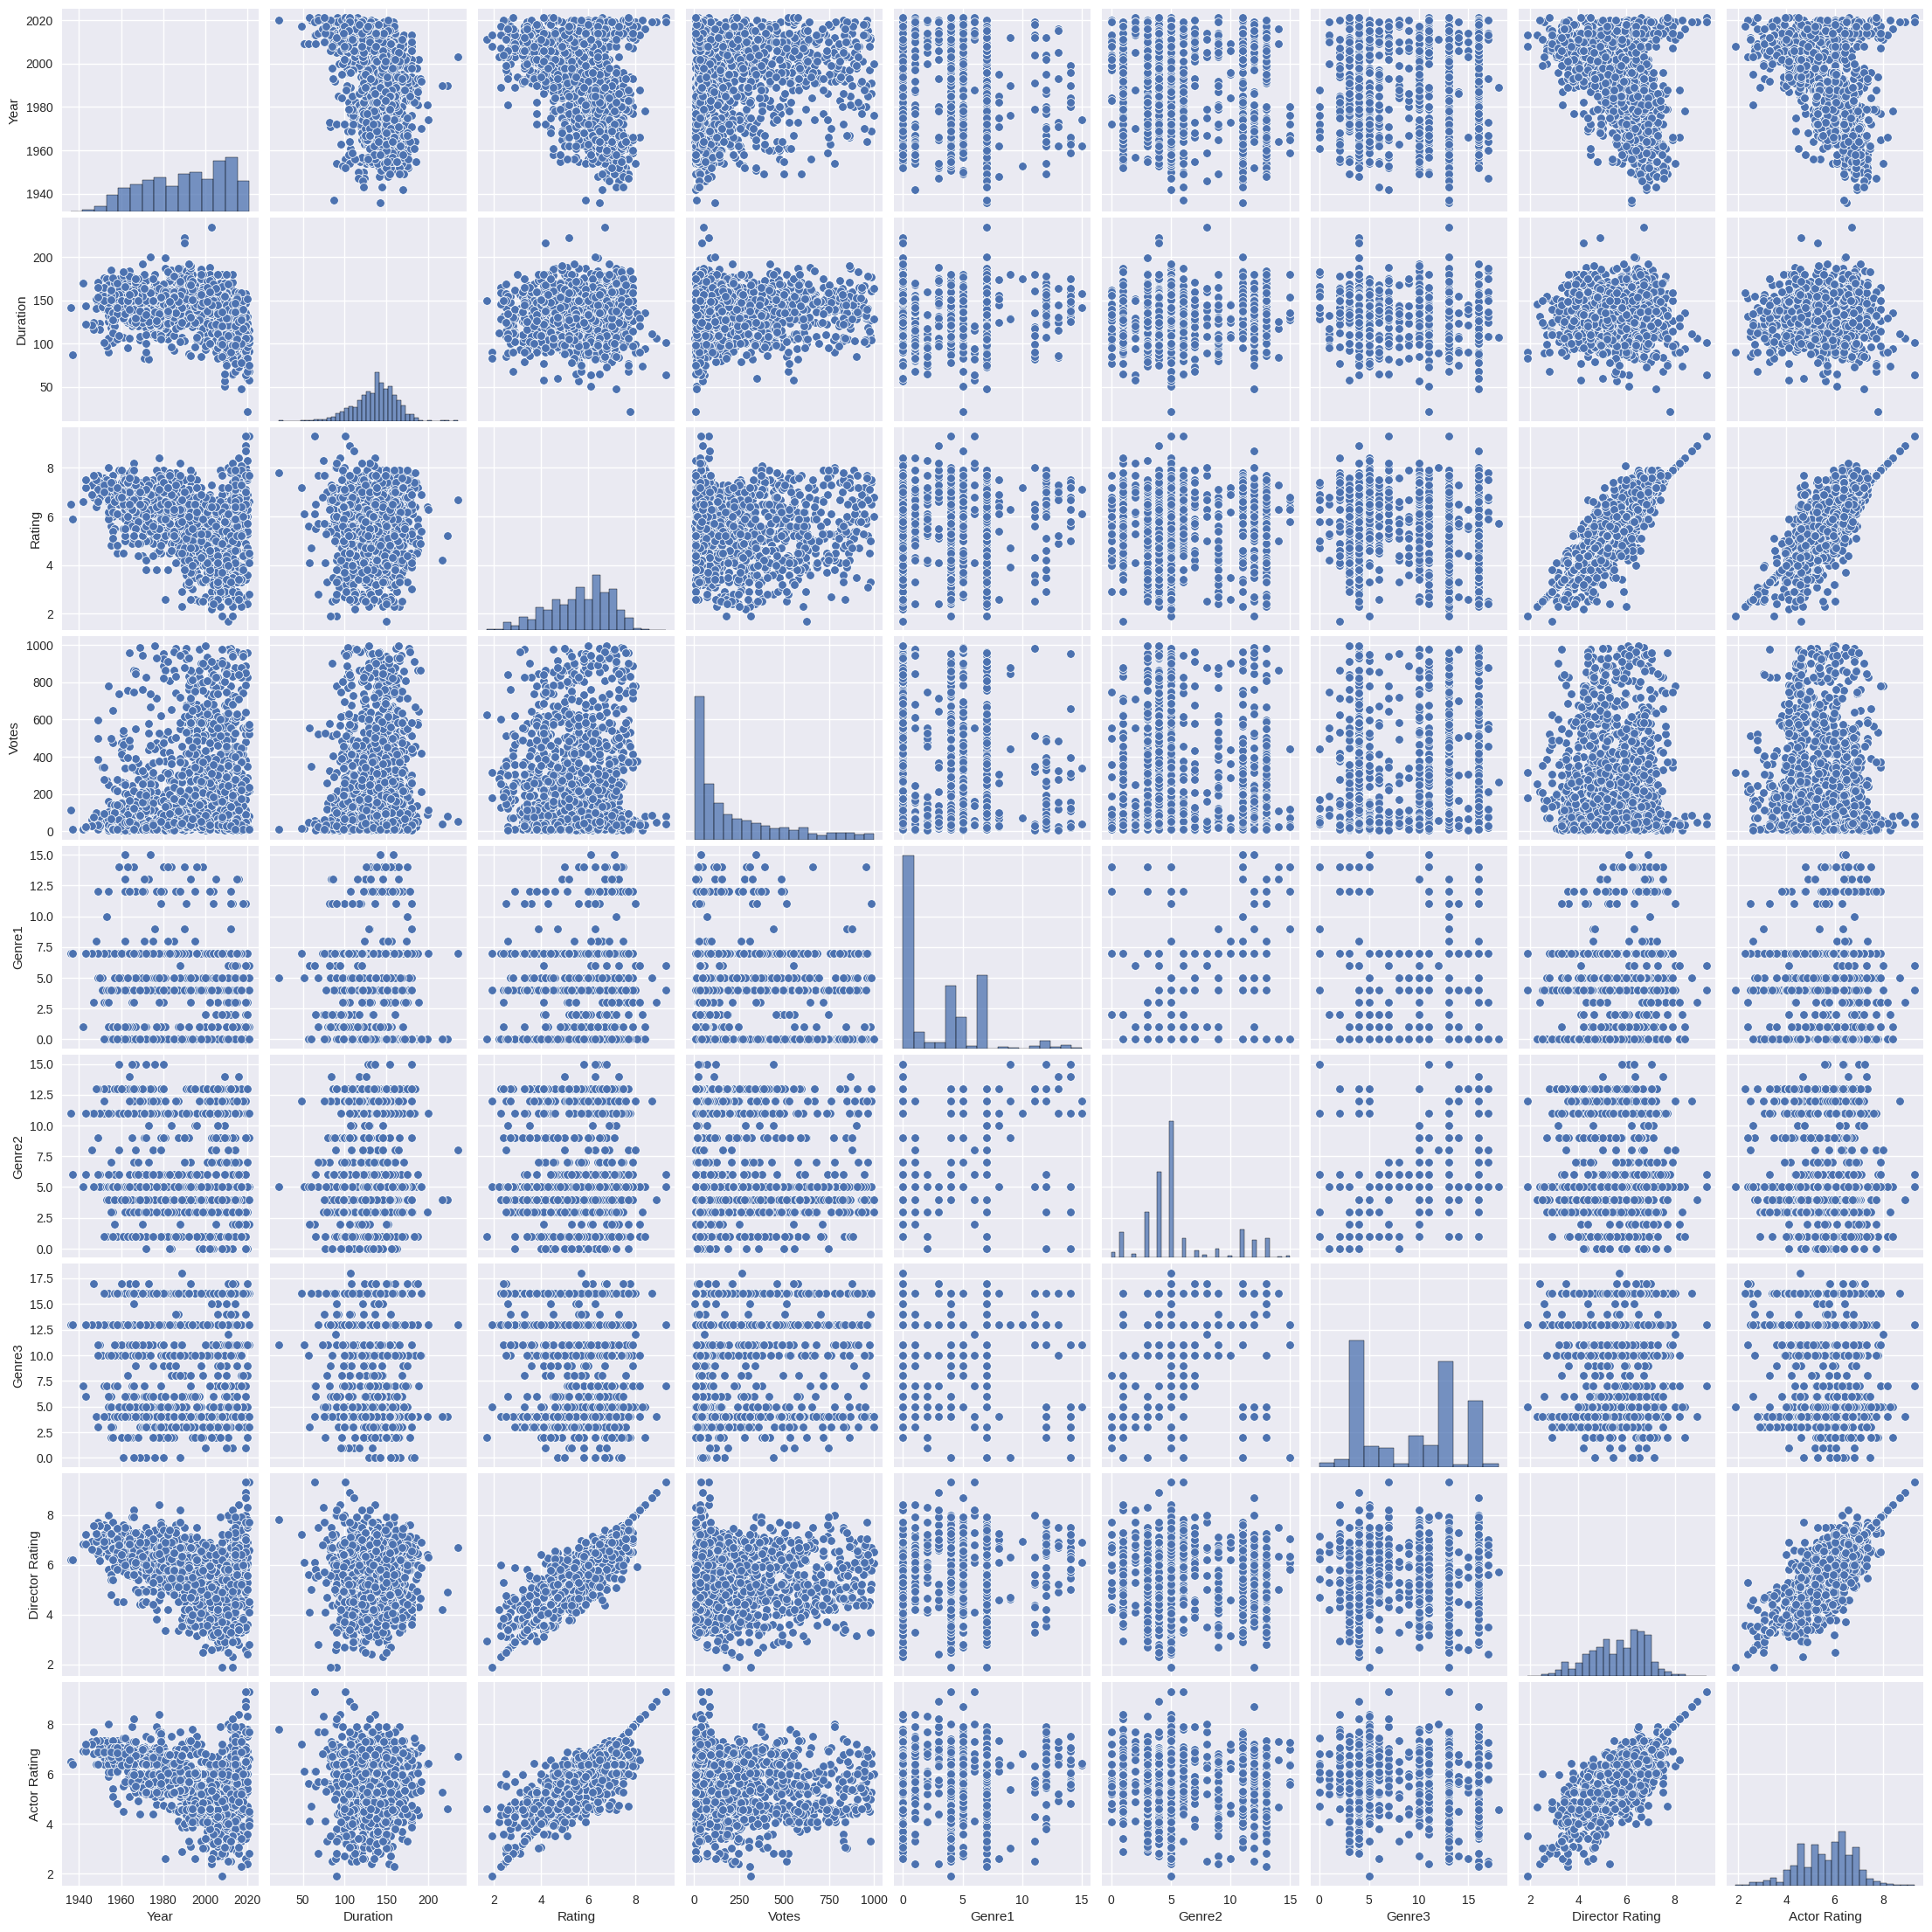

In [97]:
#bi variant plot

sns.pairplot(df)
plt.show()

In [98]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Genre1', 'Genre2', 'Genre3',
       'Director Rating', 'Actor Rating'],
      dtype='object')

In [99]:
###train-test split

y = df['Rating']
X = df[['Year', 'Duration','Votes', 'Genre1', 'Genre2',
       'Genre3', 'Director Rating', 'Actor Rating']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [100]:
print("Train_X:", X_train.shape)
print("Train_y:", y_train.shape)
print("Test_X:", X_test.shape)
print("Test_y:", y_test.shape)

Train_X: (1149, 8)
Train_y: (1149,)
Test_X: (288, 8)
Test_y: (288,)


In [101]:
##ENSEMBLE METHOD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with Random Forest
regressionRF = Pipeline([
    ("scl", StandardScaler()),  # Standardize the data
    ("predictor", RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor
])

# Train the model
regressionRF.fit(X_train, y_train)

# Evaluate model performance
acc_train_rf = regressionRF.score(X_train, y_train)
acc_test_rf = regressionRF.score(X_test, y_test)
print(f"Random Forest Train Accuracy (R2): {acc_train_rf}")
print(f"Random Forest Test Accuracy (R2): {acc_test_rf}")


Random Forest Train Accuracy (R2): 0.977354865996029
Random Forest Test Accuracy (R2): 0.8301209787572277


In [102]:
##Random forest regression with standard scalar

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
regressionRF = Pipeline([
    ("scl", StandardScaler()),  # Standardize the data
    ("predictor", RandomForestRegressor(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'predictor__n_estimators': [50,100],
    'predictor__max_depth': [10, 20, 30],
    'predictor__min_samples_split': [ 5, 10],
    'predictor__min_samples_leaf': [2, 4],
}

# Set up the grid search
grid_search = GridSearchCV(estimator=regressionRF, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score found: {grid_search.best_score_}")

# Evaluate the best model
best_model = grid_search.best_estimator_

acc_train_rf = best_model.score(X_train, y_train)
acc_test_rf = best_model.score(X_test, y_test)

print(f"Random Forest Train Accuracy (R2): {acc_train_rf}")
print(f"Random Forest Test Accuracy (R2): {acc_test_rf}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'predictor__max_depth': 20, 'predictor__min_samples_leaf': 4, 'predictor__min_samples_split': 10, 'predictor__n_estimators': 100}
Best score found: -0.27461294861723945
Random Forest Train Accuracy (R2): 0.9261465440219708
Random Forest Test Accuracy (R2): 0.8292304050498491


In [108]:
# STANDARD SCALAR WITH GRADIENT BOOSTING REGRESSION

from sklearn.ensemble import GradientBoostingRegressor


regressionGB = Pipeline([
    ("scl", StandardScaler()),
    ("predictor", GradientBoostingRegressor())
])

#hyperparameter grid
param_grid_gb = {
    'predictor__n_estimators': [40,50],
    'predictor__learning_rate': [0.01, 0.1],
    'predictor__max_depth': [3,5],
    'predictor__min_samples_split': [2,5],
    'predictor__min_samples_leaf': [1,2],
}

#grid search
grid_search_gb = GridSearchCV(
    estimator=regressionGB,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the model
grid_search_gb.fit(X_train, y_train)


print(f"Best parameters found: {grid_search_gb.best_params_}")
print(f"Best score found: {grid_search_gb.best_score_}")

# Evaluate the best model
best_model_gb = grid_search_gb.best_estimator_

acc_train_gb = best_model_gb.score(X_train, y_train)
acc_test_gb = best_model_gb.score(X_test, y_test)

print(f"Gradient Boosting Train Accuracy (R2): {acc_train_gb}")
print(f"Gradient Boosting Test Accuracy (R2): {acc_test_gb}")


Best parameters found: {'predictor__learning_rate': 0.1, 'predictor__max_depth': 3, 'predictor__min_samples_leaf': 1, 'predictor__min_samples_split': 2, 'predictor__n_estimators': 50}
Best score found: -0.2735088335558591
Gradient Boosting Train Accuracy (R2): 0.8838834521857194
Gradient Boosting Test Accuracy (R2): 0.8338812503597605
